## Understanding Descriptive Statistics

Import the necessary libraries here:

In [286]:
# Libraries
import pandas as pd
import scipy
import numpy
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [8]:
# let's define the function, our entrance argument will be the number of rolls,
#we will create a dataframe and append a random number to it with a for with the number of rolls 
#don't forget to chenge the range so it will not include 0
#you will have to use the ignore_index=True to change the index for each roll
def rolls(n_rolls):
    df_roll = pd.DataFrame(columns=["Number_Rolled"])
    for i in range(n_rolls):
        df_roll = df_roll.append({"Number_Rolled":random.choices(range(1,7))[0]}, ignore_index=True)
    return df_roll


In [190]:
roll_df = rolls(10)


## Plot the results sorted by value.

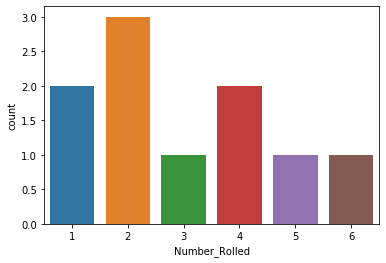

In [191]:
# your code here
sns.countplot(roll_df["Number_Rolled"])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

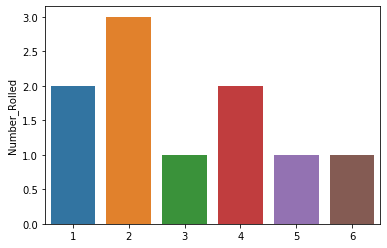

In [192]:
# your code here
#type(roll_df["Number_Rolled"].value_counts().index)
sns.barplot(x=roll_df["Number_Rolled"].value_counts().index,y=roll_df["Number_Rolled"].value_counts())

In [193]:
"""
They show the same information
"""

'\nThey show the same information\n'

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [226]:
# you already know how to make a function to calculate the mean let's try something a bit harder 
#here the mean will be calculated for all the numeric columns and the return will be given in a dataframe
def mean_rutz(df):
    mean_df = pd.DataFrame(columns=["Variable","Mean"])
    for i in df.columns:
        if type(df[i][0])== int or type(df[i][0])== float or type(df[i][0])== numpy.int64:
            mean_df= mean_df.append({"Variable":i,"Mean":(sum(df[i])/len(df))},ignore_index=True)
    return mean_df.style.hide_index()#the .style attribute allows us to change the design of our dataframe,
                                    #here it is removing the index from the visualization
    

In [227]:
mean_rutz(roll_df)

Variable,Mean
Number_Rolled,3


## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [229]:
# your code here
#this function will also calculate the mean but we will use the results of value_counts to do so
#we will sum the multiplication of the numbers and their frequency
#then we will divide that value by the sum of all frequencies
def mean_rutz2(df):
    mean_df = pd.DataFrame(columns=["Variable","Mean"])
    for i in df.columns:
        if type(df[i][0])== int or type(df[i][0])== float or type(df[i][0])== numpy.int64 :
            s=0
            for j in df[i].value_counts().index:
                s+=(j*df[i].value_counts()[j])
            m=s/sum(df[i].value_counts())
            mean_df= mean_df.append({"Variable":i,"Mean":m},ignore_index=True)
    return mean_df.style.hide_index()

    
mean_rutz2(roll_df)

Variable,Mean
Number_Rolled,3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [230]:
#the median is calculated as the mean of the two central numbers for the even numbered sets
#and as the central number of the odd numbered sets
#don't forget to order your dataframe to calculate the median
def median_rutz(df):
    median_df = pd.DataFrame(columns=["Variable","Median"])
    for i in df.columns:
        if type(df[i][0])== int or type(df[i][0])== float or type(df[i][0])== numpy.int64:
            df=df.sort_values(by=i)
            if (len(df)) % 2 == 0:
                median = (df[i][(len(df)/2)-2]+df[i][(len(df)/2)-1])/2
            else:
                median = df[i][(len(df)//2)-1]
            median_df= median_df.append({"Variable":i,"Median":median},ignore_index=True)
    return median_df.style.hide_index()
             

In [198]:
median_rutz(roll_df)

Variable,Median
Number_Rolled,3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [1]:
#the quartiles are the medians of our list splited in the middle the question seems to be asking for 
#the interquartile range so this function shows both informations
#for even numbered lists our splitted list can have both even or odd sizes so don't foget
#to put conditions for both cases
def quartile_rutz(df):
    quartile_df = pd.DataFrame(columns=["Variable","First_interval","Q1","Second_interval","Median","Third_interval","Q3","Fourth_interval"])
    for i in df.columns:
        if type(df[i][0])== int or type(df[i][0])== float or type(df[i][0])== numpy.int64 or type(df[i][0])==numpy.float64:
            df = df.sort_values(by=i)
            df.reset_index(drop=True,inplace=True)
            if (len(df)) % 2 == 0:
                median = (df[i][(len(df)/2)-1]+df[i][(len(df)/2)])/2
                if len(df[0:int((len(df)/2))]) %2== 0:
                    q1 = (df[i][(len(df)//4)-1]+df[i][(len(df)//4)])/2
                    q3 = (df[i][(3*(len(df)//4)-1)]+df[i][(3*(len(df)//4))])/2
                    ran1 = df[0:(len(df)//4)][i]
                    ran2 = df[((len(df)//4)+1):(len(df)//2)][i]
                    ran3 = df[(len(df)//2+1):((3*len(df))//4)][i]
                    ran4 = df[(((3*len(df))//4)):len(df)][i]
                else: 
                    q1 = df[i][(len(df)//4)]
                    q3 = df[i][(3*(len(df)//4))]
                    ran1 = df[0:(len(df)//4)][i]
                    ran2 = df[(len(df)//4):(len(df)//2)][i]
                    ran3 = df[(len(df)//2):((3*len(df))//4)][i]
                    ran4 = df[(((3*len(df))//4)):len(df)][i]
            else:
                median = df[i][(len(df)//2)]
                q1 = df[i][(len(df)//4)]
                q3 = df[i][(3*(len(df)//4))]
                ran1 = df[0:(len(df)//4)][i]
                ran2 = df[(len(df)//4):(len(df)//2)][i]
                ran3 = df[(len(df)//2):((3*len(df))//4)][i]
                ran4 = df[(((3*len(df))//4)):len(df)][i]
            
            quartile_df= quartile_df.append({"Variable":i,"First_interval":list(ran1),"Q1":q1,"Second_interval":list(ran2),"Median":median,"Third_interval":list(ran3),"Q3":q3,"Fourth_interval":list(ran4)},ignore_index=True)
    return quartile_df.style.hide_index()
             

In [200]:
quartile_rutz(roll_df)

Variable,First_interval,Q1,Second_interval,Median,Third_interval,Q3,Fourth_interval
Number_Rolled,"[1, 1]",2,"[2, 2, 2]",2.5,"[3, 4]",4,"[4, 5, 6]"


# Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
## 1.- Sort the values and plot them. What do you see?

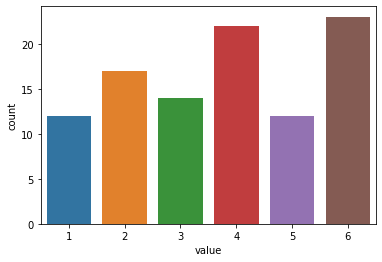

In [210]:
# your code here
roll_data=pd.DataFrame(pd.read_csv("data/roll_the_dice_hundred.csv"))
sns.countplot(roll_data.sort_values(by="value")["value"])

In [ ]:
"""
your comments here
It is a table wit the values of 100 dice rolls, the one I did looked prettier.
It is a very weird distribution is it a jinxed dice? no one knows
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [228]:
# your code here
mean_rutz(roll_data)

Variable,Mean
Unnamed: 0,49.5
roll,49.5
value,3.74


#### 3.- Now, calculate the frequency distribution.


In [247]:
# your code here
pd.DataFrame(roll_data["value"].value_counts())

,value
6,23
4,22
2,17
3,14
5,12
1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

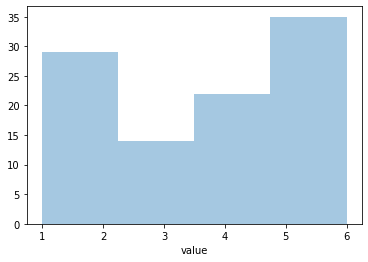

In [244]:
# your code here
#sns.barplot(x=roll_data["value"].value_counts().index,y=roll_data["value"].value_counts())
sns.distplot(roll_data["value"], hist=True, kde =False)

In [ ]:
"""
your comments here
This is not a histogram this is a barplot, we don't need the 
frequency distribution to do a histogram
"""

### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [249]:
# your code here
roll_thou = pd.DataFrame(pd.read_csv("data/roll_the_dice_thousand.csv"))

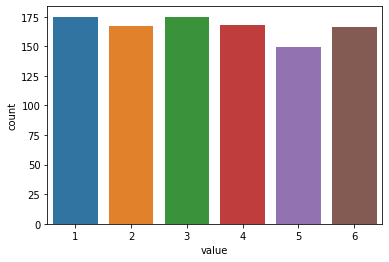

In [259]:
sns.countplot(roll_thou.sort_values(by="value")["value"])


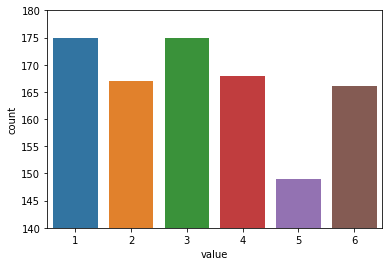

In [260]:
plt.ylim(140, 180)
sns.countplot(roll_thou.sort_values(by="value")["value"])

In [ ]:
"""
your comments here
It is more closely distributed but the 5 is having troubles yet again
"""

# Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [262]:
# your code here
age_df= pd.DataFrame(pd.read_csv("data/ages_population.csv"))

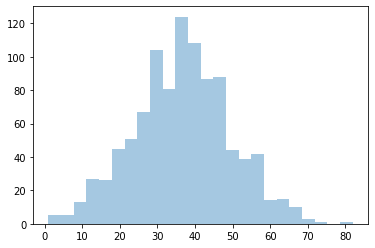

In [266]:
sns.distplot(age_df,kde=False)
#guessing mean 40 and std 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [267]:
# your code here
age_df.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
kind of? the mean is a little lower and the std is a little higher
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [268]:
# your code here
age_df_2= pd.DataFrame(pd.read_csv("data/ages_population2.csv"))

In [270]:
age_df_2.observation.value_counts().head()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
Name: observation, dtype: int64

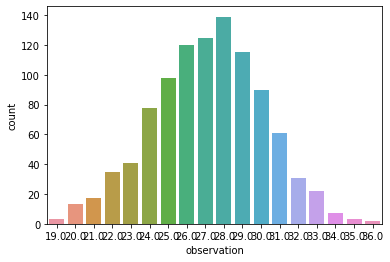

In [272]:
sns.countplot(age_df_2.observation)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
this time the mean is arround 27 and std arround 4
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [273]:
# your code here
age_df_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
People in this neighborhood are younger, in their 20's
"""

# Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

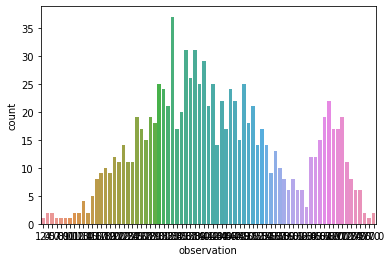

In [278]:
# your code here
age_df_3=pd.DataFrame(pd.read_csv("data/ages_population3.csv"))
age_df_3["observation"].value_counts().head()
sns.countplot(age_df_3.observation)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [279]:
# your code here
age_df_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
# More ages and overall older people
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [285]:
# your code here
quartile_rutz(age_df_3)

Variable,First_interval,Q1,Second_interval,Median,Third_interval,Q3,Fourth_interval
observation,"[1.0, 2.0, 2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]",30,"[30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]",40,"[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0,

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
Nope not doing that
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [290]:
# your code here
scipy.stats.kruskal(age_df,age_df_2,age_df_3)

KruskalResult(statistic=697.0874498544146, pvalue=4.259744610458989e-152)

In [ ]:
"""
The Kruskal-Wallis H-test 
tests the null hypothesis that the population median of all of the groups are equal
since the pvalue is much smaller than 0.05 we reject the null hypothesis
Our groups are different
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal
"""